*Membre du groupe: Vincent Dubuisson n° étudiant 22210352*

### **Projet d'intelligence artificielle - Modèle de clustering et prédiction de résultat de match**

## **1 Description du projet**

**Contexte**

Au cours des vingt dernières années, les professionnels sportifs du monde entier ont adopté une approche fondée sur les données pour adapter leur prise de décision. Les analyses de métriques sportives sont aujourd’hui présentes partout, dans toutes les retransmissions en direct, dans l’eSport et même les discussions quotidiennes. Cette évolution a été notamment alimentée par une croissance exponentielle de la richesse de ces données.
Les équipes et les joueurs, de sport et d’eSport, ainsi que les parieurs professionnels font donc appel à la Data Science et au Machine Learning pour prendre les décisions les plus éclairées. Les sites de paris sportifs sont devenus très sophistiqués dans ce domaine, et certains modèles peuvent également être utilisés par les managers d'équipes ou des recruteurs pour constituer des équipes et déployer stratégiquement des joueurs de manière à maximiser leurs chances de victoire.
Le football a été au cœur de la révolution de l'analyse sportive. Tout type de métriques, à la fois historiques et en temps réel, sont aujourd’hui disponibles. Ce challenge s'appuie sur des données de football obtenues auprès de Sportmonks, un fournisseur majeur de données sportives largement utilisées dans ce domaine.
Ce projet est une modification de celui proposé par à challengedata.qube-rt.com

**But**

Dans le cadre du data challenge QRT de cette année, vous devez proposer :

*    un modèle de clustering (vous pouvez choisir ce que vous voulez clusteriser : les joueurs, les matchs, les équipes).
*    un modèle de prédiction de résultat de match. Vous recevrez des données historiques réelles au niveau des équipes et des joueurs, et vous devrez prédire quelle équipe gagne ou s'il y a un match nul.

Les données couvrent de nombreuses ligues dans le monde entier ainsi que différentes divisions.

## **2 Modèle de clustering**

**Apprentissage du modèle**

Dans cette section, je propose un modèle de clustering pour prédire le style de jeu d'une équipe basé sur les moyennes statistiques de ses 5 derniers matchs.

Les différents styles qu'une équipe peut adopter sont les suivants:

*   Offensif
*   Dominant
*   Equilibré
*   Défensif



Pour débuter cette section, on importe toutes les librairies qui vont être utile par la suite, ainsi que les deux fichiers d'entraînement sur les équipes *'train_away_team_statistics_df.csv'* et *'train_home_team_statistics_df.csv'*

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

In [2]:
uploaded = files.upload()

Saving train_home_team_statistics_df.csv to train_home_team_statistics_df.csv
Saving train_away_team_statistics_df.csv to train_away_team_statistics_df.csv


Ensuite on crée des variables pour lire les deux fichiers puis on concatène les deux fichiers afin de n'avoir qu'une seule variable qui va stocker toutes les équipes. On vérifie que la variable contient bien les deux fichiers à l'aide de l'affichage du nombre de lignes.

In [3]:
away_df = pd.read_csv('train_away_team_statistics_df.csv')
home_df = pd.read_csv('train_home_team_statistics_df.csv')

data_teams = pd.concat([home_df, away_df], ignore_index=True)

print(data_teams.shape)
data_teams.head()

(24606, 143)


,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
0,0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


Dans le but de proposer un modèle de clustering, on va utiliser l'algorithme de K-means avec k = 4, la distance euclidienne pour la distance entre individus et la distance entre controïdes pour la distance entre groupes.

Afin d'evaluer les clusters, on va utiliser des variables qui permettent de classer les équipes selon leur leur style de jeu. Pour cela, chaque variable d'une équipe va se voir attribuer un score de 0 à 3 pour chaque style de jeu, par exemple:
*    pour la variable du nombre d'attaque d'une équipe, le style 'Offensif' va avoir le maximum en score d'attaque donc le score de 3, et le style 'Défensif' le score de 0.
*    pour la variable du pourcentage de passes réussies, le style 'Dominant' va avoir un score de 3.

Ainsi on va créer un dictionnaire pour contenir les scores de chaque style associés à chaque variables.
Pour le modèle on aura aussi besoin d'un tableau des styles et d'un tableau des variables utilisées.

Ce système d'attribution de score pour chaque cluster va nous permettre à la fin du modèle d'attribuer un style de jeu à un cluster.

In [15]:
styles = ['Défensif', 'Equilibré', 'Dominant', 'Offensif']

style_scoring = {
    "TEAM_ATTACKS_5_last_match_average": {
        "Défensif": 0, "Equilibré": 1, "Dominant": 2, "Offensif": 3
    },
    "TEAM_BALL_POSSESSION_5_last_match_average": {
        "Défensif": 0, "Equilibré": 1, "Offensif": 2, "Dominant": 3
    },
    "TEAM_CORNERS_5_last_match_average": {
        "Défensif": 0, "Equilibré": 1, "Dominant": 2, "Offensif": 3
    },
    "TEAM_GOALS_5_last_match_average": {
        "Défensif": 0, "Equilibré": 1, "Dominant": 2, "Offensif": 3
    },
    "TEAM_FOULS_5_last_match_average": {
        "Dominant": 0, "Offensif": 1, "Equilibré": 2, "Défensif": 3
    },
    "TEAM_OFFSIDES_5_last_match_average": {
        "Défensif": 0, "Dominant": 1, "Offensif": 2, "Equilibré": 3
    },
    "TEAM_PASSES_5_last_match_average": {
        "Défensif": 0, "Equilibré": 1, "Offensif": 2, "Dominant": 3
    },
    "TEAM_PENALTIES_5_last_match_average": {
        "Défensif": 0, "Equilibré": 1, "Dominant": 2, "Offensif": 3
    },
    "TEAM_SAVES_5_last_match_average": {
        "Dominant": 0, "Offensif": 1, "Equilibré": 2, "Défensif": 3
    },
    "TEAM_SHOTS_TOTAL_5_last_match_average": {
        "Défensif": 0, "Equilibré": 1, "Dominant": 2, "Offensif": 3
    },
    "TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average": {
        "Défensif": 0, "Equilibré": 1, "Offensif": 2, "Dominant": 3
    }
}

variables_teams = list(style_scoring.keys())

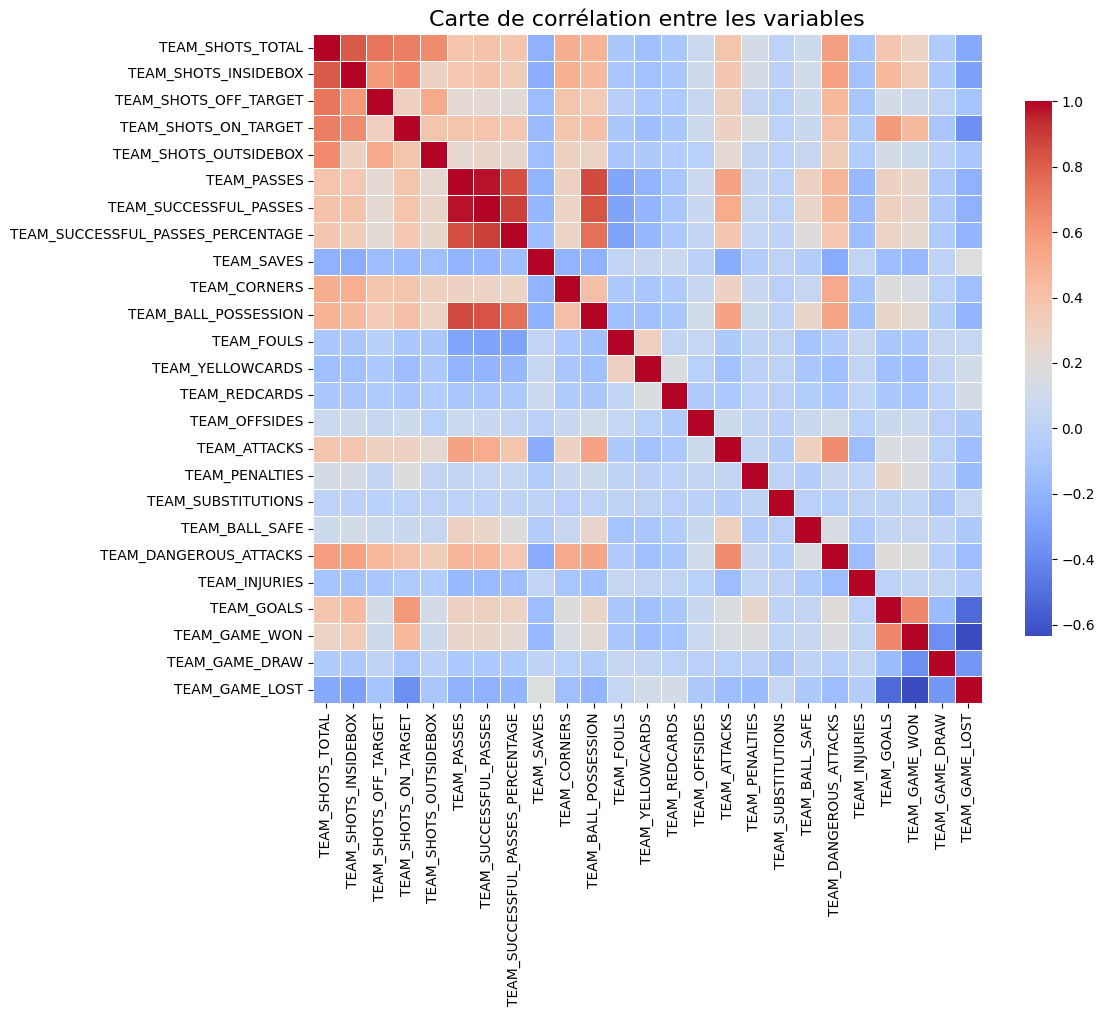

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

"""variables_teams = [
    "TEAM_SHOTS_TOTAL_5_last_match_average",
    "TEAM_SHOTS_INSIDEBOX_5_last_match_average",
    "TEAM_SHOTS_OFF_TARGET_5_last_match_average",
    "TEAM_SHOTS_ON_TARGET_5_last_match_average",
    "TEAM_SHOTS_OUTSIDEBOX_5_last_match_average",
    "TEAM_PASSES_5_last_match_average",
    "TEAM_SUCCESSFUL_PASSES_5_last_match_average",
    "TEAM_SUCCESSFUL_PASSES_PERCENTAGE_5_last_match_average",
    "TEAM_SAVES_5_last_match_average",
    "TEAM_CORNERS_5_last_match_average",
    "TEAM_BALL_POSSESSION_5_last_match_average",
    "TEAM_FOULS_5_last_match_average",
    "TEAM_YELLOWCARDS_5_last_match_average",
    "TEAM_REDCARDS_5_last_match_average",
    "TEAM_OFFSIDES_5_last_match_average",
    "TEAM_ATTACKS_5_last_match_average",
    "TEAM_PENALTIES_5_last_match_average",
    "TEAM_SUBSTITUTIONS_5_last_match_average",
    "TEAM_BALL_SAFE_5_last_match_average",
    "TEAM_DANGEROUS_ATTACKS_5_last_match_average",
    "TEAM_INJURIES_5_last_match_average",
    "TEAM_GOALS_5_last_match_average",
    "TEAM_GAME_WON_5_last_match_average",
    "TEAM_GAME_DRAW_5_last_match_average",
    "TEAM_GAME_LOST_5_last_match_average"
]


# Crée une copie du DataFrame avec les bonnes colonnes
df = away_df[variables_teams].copy()

# Renomme les colonnes en supprimant le suffixe "_5_last_match_average"
renamed_columns = {
    col: col.replace("_5_last_match_average", "") for col in df.columns
}
df.rename(columns=renamed_columns, inplace=True)

# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

# Affichage de la heatmap sans annotations
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Carte de corrélation entre les variables", fontsize=16)
plt.tight_layout()
plt.show()
"""

On peut donc lancer l'algorithme de K-means avec 4 clusters correspondant au nombre de style de jeu, on récupère chaque variable en prenant le soin d'enlever les données non définies.

On affiche ensuite le nombre d'équipe calculés pour vérifier que la classification n'est pas déséquilibrée.

In [12]:
data_clustering = data_teams[variables_teams].copy()
data_clustering.dropna(inplace=True)

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(data_clustering)

data_clustering = data_teams.loc[data_clustering.index].copy()
data_clustering["CLUSTER"] = kmeans.labels_

print(data_clustering["CLUSTER"].value_counts().sort_index())

CLUSTER
0    4054
1    5705
2    3209
3    4332
Name: count, dtype: int64


On affiche les moyennes de chaque variable pour chaque cluster afin de vérifier par la suite notre modèle de clustering.

In [13]:
summary = data_clustering.groupby("CLUSTER")[variables_teams].mean()
summary["STYLE_JEU"] = ""
print(summary.round(2))

         TEAM_SHOTS_TOTAL_5_last_match_average  \
CLUSTER                                          
0                                         5.09   
1                                         1.72   
2                                         7.54   
3                                         3.77   

         TEAM_SHOTS_INSIDEBOX_5_last_match_average  \
CLUSTER                                              
0                                             4.86   
1                                             1.74   
2                                             7.21   
3                                             3.29   

         TEAM_SHOTS_OFF_TARGET_5_last_match_average  \
CLUSTER                                               
0                                              4.58   
1                                              2.41   
2                                              6.40   
3                                              4.27   

         TEAM_SHOTS_ON_TARGET_5_last_match_

Dans le code suivant, on calcule et affiche le pourcentage de correspondance de chaque style pour chaque cluster afin de pouvoir déterminer manuellement les styles associés aux clusters.

Pour procéder à ce calcul:
*   On commence par initialiser le tableau de scores pour chaque cluster.
*   Ensuite pour chaque variable de notre modèle, on tri les clusters par valeur de leur moyenne croissante. Puis on associe le rang du cluster à un style de jeu selon notre dictionnaire des scores.
*   Enfin on calcul le pourcentage moyen de styles par cluster et on affiche cela en histogramme pour chaque cluster

Résultats de l'estimation du style de jeu pour chaque cluster


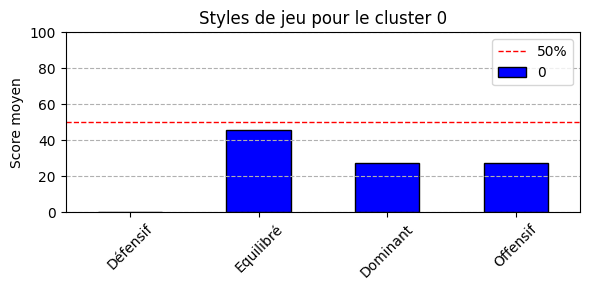

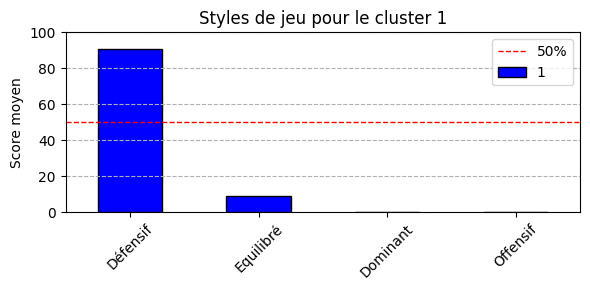

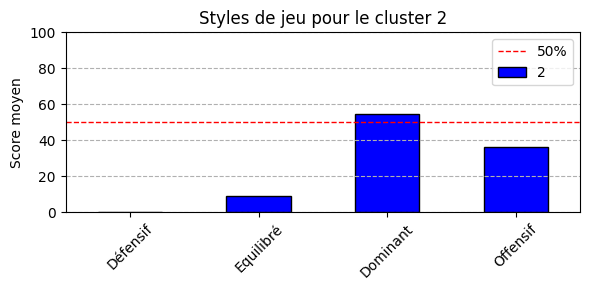

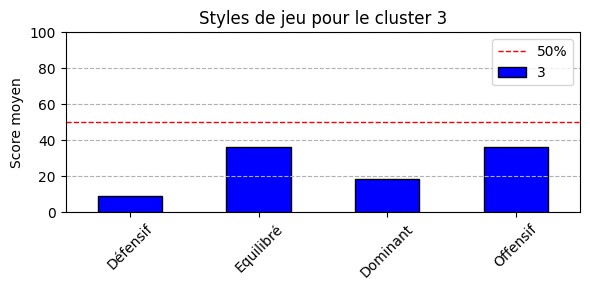

In [16]:
# Initialisation des scores
cluster_style_scores = pd.DataFrame(index=summary.index, columns=styles).fillna(0)
pd.set_option('future.no_silent_downcasting', True) # évite un message "d'erreur" d'une utilisation de commande bientôt dépassée

# Remplissage des scores
for var in variables_teams:
    cluster_ranking = summary[var].rank(ascending=True, method="first").astype(int) - 1  # de 0 (faible) à 3 (fort)

    # Association du rang du cluster au style de jeu correspondant
    style_ranking = style_scoring[var]
    style_by_score = sorted(style_ranking.items(), key=lambda x: x[1])  # Liste ordonnée par score

    # Attribution d'un style dominant au cluster pour cette variable
    for cluster in summary.index:
        style = style_by_score[cluster_ranking[cluster]][0]
        cluster_style_scores.loc[cluster, style] += 1
        # pour chaque variable, chaque cluster reçoit +1 point pour un style.

# Calcul du pourcentage moyen de styles par cluster
cluster_style_scores_mean = cluster_style_scores / len(variables_teams) * 100
cluster_style_scores_mean = cluster_style_scores_mean.astype(float).round(1)

# Création des histogrammes pour chaque cluster
print("Résultats de l'estimation du style de jeu pour chaque cluster")
for cluster_id in cluster_style_scores_mean.index:
    style_scores = cluster_style_scores_mean.loc[cluster_id]

    plt.figure(figsize=(6, 3))
    style_scores.plot(kind='bar', color='blue', edgecolor='black')
    plt.title(f'Styles de jeu pour le cluster {cluster_id}')
    plt.ylabel('Score moyen')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.axhline(y=50, color='r', linestyle='--', linewidth=1, label='50%')
    plt.legend()
    plt.tight_layout()
    plt.show()

Finalement, on observe bien le style qui prédomine dans chaque cluster et on peut affecter manuellement un style de jeu à un cluster représentant un ensemble d'équipe.

On peut vérifier si le choix initial de sélectionner 4 clusters était le bon avec la méthode du coude que voici ci-dessous.

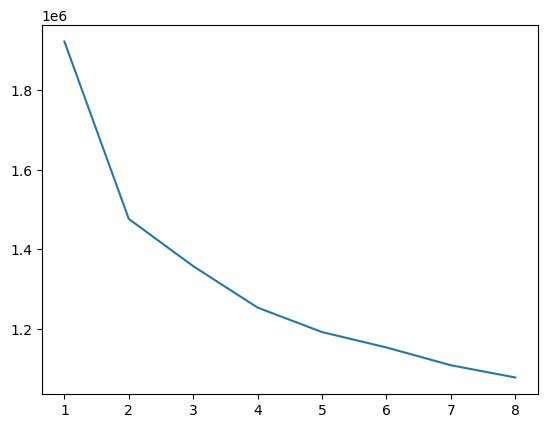

In [17]:
data_clustering = data_teams[variables_teams].copy()
data_clustering.dropna(inplace=True)

wcss = []
for K in range (1 ,9) :
  kmeans = KMeans(n_clusters = K)
  kmeans.fit(data_clustering)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)


On observe un léger coude pour k = 2, mais n'avoir que 2 clusters n'est pas vraiment démonstratif de la capacité d'un modèle à clusteriser car cela peut être trop facile, on le voit bien avec le style 'Défensif' où l'on est sûr à plus de 90% du style de jeu, et avec 3 ou 4 clusters on obtient un minimum de 55% de précision.



---
**Validation du modèle**



Dans cette section, on va tester notre modèle sur les données de test afin de le valider ou non.

Tout d'abord, on importe les deux fichiers *'test_away_team_statistics_df.csv'* et *'test_home_team_statistics_df.csv'*.

In [ ]:
uploaded = files.upload()

Saving test_away_team_statistics_df.csv to test_away_team_statistics_df (1).csv
Saving test_home_team_statistics_df.csv to test_home_team_statistics_df (1).csv


Ensuite, on relance tout la logique de notre modèle afin de voir les résultats et comparer avec la phase d'apprentissage.

CLUSTER
0    15244
1     9548
2    14400
3     8911
Name: count, dtype: int64
Résultats de l'estimation du style de jeu pour chaque cluster


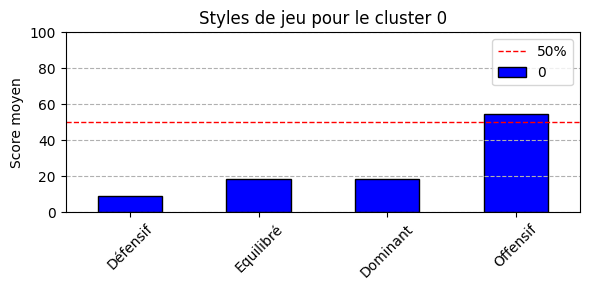

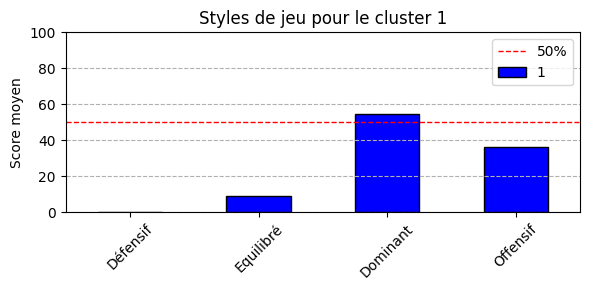

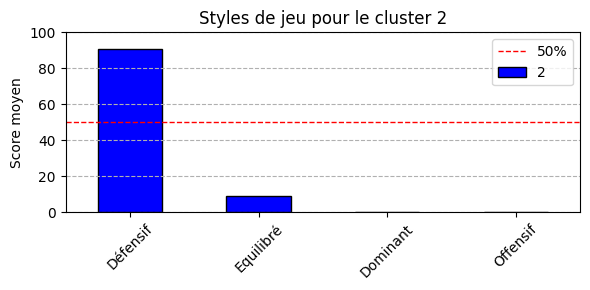

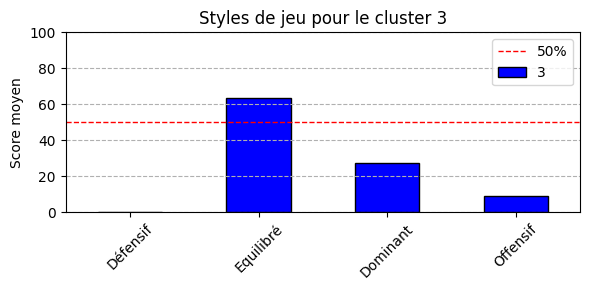

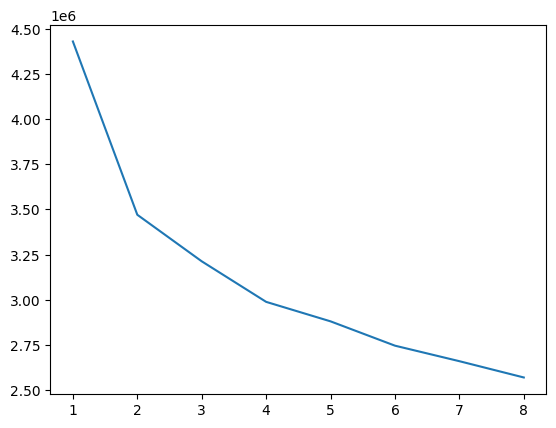

In [ ]:
away_df = pd.read_csv('test_away_team_statistics_df.csv')
home_df = pd.read_csv('test_home_team_statistics_df.csv')

data_teams = pd.concat([home_df, away_df], ignore_index=True)


data_clustering_test = data_teams[variables_teams].copy()
data_clustering_test.dropna(inplace=True)

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(data_clustering_test)

data_clustering_test = data_teams.loc[data_clustering_test.index].copy()
data_clustering_test["CLUSTER"] = kmeans.labels_

print(data_clustering_test["CLUSTER"].value_counts().sort_index())

summary = data_clustering_test.groupby("CLUSTER")[variables_teams].mean()
summary["STYLE_JEU"] = ""


cluster_style_scores_test = pd.DataFrame(index=summary.index, columns=styles).fillna(0)
pd.set_option('future.no_silent_downcasting', True)

for var in variables_teams:
    cluster_ranking = summary[var].rank(ascending=True, method="first").astype(int) - 1

    style_ranking = style_scoring[var]
    style_by_score = sorted(style_ranking.items(), key=lambda x: x[1])

    for cluster in summary.index:
        style = style_by_score[cluster_ranking[cluster]][0]
        cluster_style_scores_test.loc[cluster, style] += 1

cluster_style_scores_mean_test = cluster_style_scores_test / len(variables_teams) * 100
cluster_style_scores_mean_test = cluster_style_scores_mean_test.astype(float).round(1)

print("Résultats de l'estimation du style de jeu pour chaque cluster")
for cluster_id in cluster_style_scores_mean_test.index:
    style_scores = cluster_style_scores_mean_test.loc[cluster_id]

    plt.figure(figsize=(6, 3))
    style_scores.plot(kind='bar', color='blue', edgecolor='black')
    plt.title(f'Styles de jeu pour le cluster {cluster_id}')
    plt.ylabel('Score moyen')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.axhline(y=50, color='r', linestyle='--', linewidth=1, label='50%')
    plt.legend()
    plt.tight_layout()
    plt.show()

data_clustering_plt = data_teams[variables_teams].copy()
data_clustering_plt.dropna(inplace=True)

wcss = []
for K in range (1 ,9) :
  kmeans = KMeans(n_clusters = K)
  kmeans.fit(data_clustering_plt)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 9), wcss)

On remarque que l'on obtient les mêmes résultats, on peut donc valider notre modèle.

## **3 Modèle de prédiction**

Dans cette section, je propose un modèle de prédiction de match entre deux équipes pour prédire l'équipe gagnante ou un nul. Cette prédiction sera basée sur les moyennes des statistiques de la saison et des 5 derniers matchs de chaques équipes.

(PS : j'ai essayé d'utiliser les données des joueurs mais les fichiers étant trop volumineux, cela prenait trop de temps pour l'import)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.impute import SimpleImputer
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

On commence par importer les fichiers de train des deux équipes.

In [ ]:
uploaded = files.upload()

Ensuite, on sélectionne les variables jugées les plus utiles qui font être utilisées pour le modèle de prédiction. On lie les données des deux équipes selon l'ID du match.

In [19]:
away_df = pd.read_csv('train_away_team_statistics_df.csv')
home_df = pd.read_csv('train_home_team_statistics_df.csv')

variables_teams = [
    "TEAM_ATTACKS_season_average",
    "TEAM_CORNERS_season_average",
    "TEAM_GOALS_season_average",
    "TEAM_SAVES_season_average",
    "TEAM_SHOTS_ON_TARGET_season_average",
    "TEAM_GAME_WON_season_average",
    "TEAM_GAME_DRAW_season_average",
    "TEAM_GAME_LOST_season_average",
    "TEAM_ATTACKS_5_last_match_average",
    "TEAM_CORNERS_5_last_match_average",
    "TEAM_GOALS_5_last_match_average",
    "TEAM_SAVES_5_last_match_average",
    "TEAM_SHOTS_ON_TARGET_5_last_match_average",
    "TEAM_GAME_WON_5_last_match_average",
    "TEAM_GAME_DRAW_5_last_match_average",
    "TEAM_GAME_LOST_5_last_match_average"
]

away_mean = away_df[variables_teams].copy()
home_mean = home_df[variables_teams].copy()

away_mean['ID'] = away_df['ID']
home_mean['ID'] = home_df['ID']

away_mean = away_mean.rename(columns=lambda x: 'AWAY_' + x if x != 'ID' else x)
home_mean = home_mean.rename(columns=lambda x: 'HOME_' + x if x != 'ID' else x)

# Fusion des données des deux équipes en un seul DataFrame
X = pd.merge(home_mean, away_mean, on='ID')

# Vérification
print("X shape:", X.shape)
print("Colonnes disponibles :", X.columns.tolist())

X shape: (12303, 33)
Colonnes disponibles : ['HOME_TEAM_ATTACKS_season_average', 'HOME_TEAM_CORNERS_season_average', 'HOME_TEAM_GOALS_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_GAME_WON_season_average', 'HOME_TEAM_GAME_DRAW_season_average', 'HOME_TEAM_GAME_LOST_season_average', 'HOME_TEAM_ATTACKS_5_last_match_average', 'HOME_TEAM_CORNERS_5_last_match_average', 'HOME_TEAM_GOALS_5_last_match_average', 'HOME_TEAM_SAVES_5_last_match_average', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_average', 'HOME_TEAM_GAME_WON_5_last_match_average', 'HOME_TEAM_GAME_DRAW_5_last_match_average', 'HOME_TEAM_GAME_LOST_5_last_match_average', 'ID', 'AWAY_TEAM_ATTACKS_season_average', 'AWAY_TEAM_CORNERS_season_average', 'AWAY_TEAM_GOALS_season_average', 'AWAY_TEAM_SAVES_season_average', 'AWAY_TEAM_SHOTS_ON_TARGET_season_average', 'AWAY_TEAM_GAME_WON_season_average', 'AWAY_TEAM_GAME_DRAW_season_average', 'AWAY_TEAM_GAME_LOST_season_average', 'AWAY_TEAM

On importe aussi le fichier des résultat de prédictions *'Y_train_1rknArQ.csv'* pour les datasets de train afin de comparer les résultats et améliorer notre modèle.

In [20]:
uploaded = files.upload()

Saving Y_train_1rknArQ.csv to Y_train_1rknArQ.csv


Puis on prépare nos deux datasets d'entrées d'entrainement du modèle de prédiction.

In [25]:
# Chargement des résultats de prédiction
y_df = pd.read_csv('Y_train_1rknArQ.csv')

# Fusion des résultats avec les données d'entrée en fonction de l'ID du match
X_final = pd.merge(X, y_df, on='ID')

# Séparation des résultats des variables d'entrées
y = X_final[['HOME_WINS', 'DRAW', 'AWAY_WINS']].values
X_final = X_final.drop(columns=['HOME_WINS', 'DRAW', 'AWAY_WINS'])

# Suppression de la colonne ID
if 'ID' in X_final.columns:
    X_final = X_final.drop(columns=['ID'])

# Vérification
print("X_final shape:", X_final.shape)
print("Colonnes disponibles :", X_final.columns.tolist())


X_final shape: (12303, 32)
Colonnes disponibles : ['HOME_TEAM_ATTACKS_season_average', 'HOME_TEAM_CORNERS_season_average', 'HOME_TEAM_GOALS_season_average', 'HOME_TEAM_SAVES_season_average', 'HOME_TEAM_SHOTS_ON_TARGET_season_average', 'HOME_TEAM_GAME_WON_season_average', 'HOME_TEAM_GAME_DRAW_season_average', 'HOME_TEAM_GAME_LOST_season_average', 'HOME_TEAM_ATTACKS_5_last_match_average', 'HOME_TEAM_CORNERS_5_last_match_average', 'HOME_TEAM_GOALS_5_last_match_average', 'HOME_TEAM_SAVES_5_last_match_average', 'HOME_TEAM_SHOTS_ON_TARGET_5_last_match_average', 'HOME_TEAM_GAME_WON_5_last_match_average', 'HOME_TEAM_GAME_DRAW_5_last_match_average', 'HOME_TEAM_GAME_LOST_5_last_match_average', 'AWAY_TEAM_ATTACKS_season_average', 'AWAY_TEAM_CORNERS_season_average', 'AWAY_TEAM_GOALS_season_average', 'AWAY_TEAM_SAVES_season_average', 'AWAY_TEAM_SHOTS_ON_TARGET_season_average', 'AWAY_TEAM_GAME_WON_season_average', 'AWAY_TEAM_GAME_DRAW_season_average', 'AWAY_TEAM_GAME_LOST_season_average', 'AWAY_TEAM

On peut donc maintenant définir l'architecture de notre réseaux de neurones.

In [34]:
# Architecture du modèle
modele = Sequential()

# Couches du modèle
modele.add(Dense(128, input_shape=(X_final.shape[1],), activation='tanh'))
modele.add(Dense(64, activation='sigmoid'))
modele.add(Dense(3, activation='softmax'))  # Sortie avec 3 neurones pour les 3 classes (victoire domicile, nul, victoire extérieur)

# Compilation du modèle
modele.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle pour vérifier l'architecture
modele.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,675 (49.51 KB)

 Trainable params: 12,675 (49.51 KB)

 Non-trainable params: 0 (0.00 B)

Maintenant que notre réseau de neurones est défini, on peut entrainer notre réseau avec les données des équipes et les résultats prédits. On prends le soin de retirer les valeurs nulles en les remplaçant par la valeur moyenne de leur colonnes afin d'avoir le même nombre de match prédit que joué.
On affiche aussi un graphique représentant la perte d'entrainement et la perte de validation afin de paramétrer le modèle pour qu'il ne fasse pas de sur-apprentissage.

Le modèle de prédiction est entrainé avec 2 epochs car avec plus de 2 epochs, la perte de validation augmentait, synonyme d'over-fitting.

Epoch 1/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4670 - loss: 1.0462 - val_accuracy: 0.4681 - val_loss: 1.0371
Epoch 2/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4830 - loss: 1.0274 - val_accuracy: 0.4937 - val_loss: 1.0180
Epoch 3/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4938 - loss: 1.0142 - val_accuracy: 0.4856 - val_loss: 1.0228
Epoch 4/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5029 - loss: 1.0085 - val_accuracy: 0.4835 - val_loss: 1.0295
Epoch 5/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4944 - loss: 1.0143 - val_accuracy: 0.4888 - val_loss: 1.0225
Epoch 6/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5036 - loss: 1.0014 - val_accuracy: 0.4884 - val_loss: 1.0275
Epoch 7/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5033 - loss: 1.0071 - val_accuracy: 0.4953 - val_loss: 1.0240
Epoch 8/25
308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5031 - loss: 1.0017 - val_accuracy: 0.

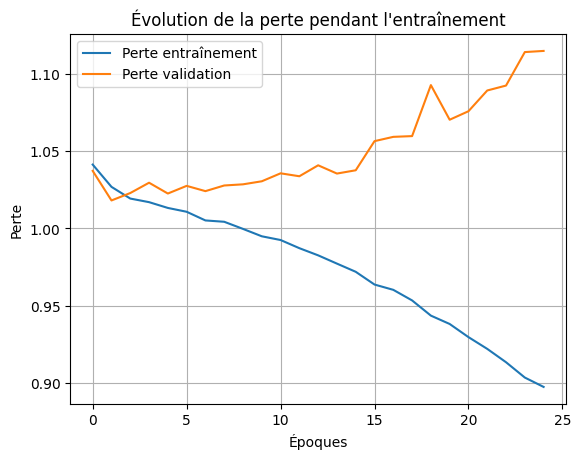

In [35]:
# Remplacement des NaN par la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_final)

# Génération des résultat pour le réseau de neurone
y_raw = np.argmax(y, axis=1) if y.ndim == 2 else y
y = to_categorical(y_raw[:X_imputed.shape[0]], num_classes=3)

# Entrainement du modèle de prédiction
history = modele.fit(X_imputed, y, validation_split=0.2, epochs=25, batch_size=32, verbose=1)

# Prédictions des résultats des matchs
y_pred_scaled = modele.predict(X_imputed)
y_pred_class = np.argmax(y_pred_scaled, axis=1)

# Affichage des 20 premières prédictions
print("Prédictions et valeurs réelles comparées :")
for i in range(20):
    print(f"Réel : {y[i]}, Prédit : {y_pred_class[i]}")

from sklearn.metrics import classification_report

print(classification_report(np.argmax(y, axis=1), y_pred_class, digits=3))

plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title("Évolution de la perte pendant l'entraînement")
plt.xlabel("Époques")
plt.ylabel("Perte")
plt.legend()
plt.grid(True)
plt.show()

Une fois notre modèle entrainé et prêt, on peut importer les fichiers de test des équipes.

In [ ]:
uploaded = files.upload()

Saving test_away_team_statistics_df.csv to test_away_team_statistics_df (2).csv
Saving test_home_team_statistics_df.csv to test_home_team_statistics_df (2).csv


Puis on lance la prédiction de résultat sur les données de test avec les mêmes variables que pour l'entrainement du modèle de prédiction.

On créer aussi un fichier de résultat de prédiction.

In [ ]:
# Charger les données de test
test_away_df = pd.read_csv('test_away_team_statistics_df.csv')
test_home_df = pd.read_csv('test_home_team_statistics_df.csv')

# Extraire les variables pertinentes
test_away_mean = test_away_df[variables_teams].copy()
test_home_mean = test_home_df[variables_teams].copy()

# Ajouter l'ID pour la fusion
test_away_mean['ID'] = test_away_df['ID']
test_home_mean['ID'] = test_home_df['ID']

# Renommer les colonnes
test_away_mean = test_away_mean.rename(columns=lambda x: 'AWAY_' + x if x != 'ID' else x)
test_home_mean = test_home_mean.rename(columns=lambda x: 'HOME_' + x if x != 'ID' else x)

# Fusionner les deux jeux de données sur l'ID
X_test = pd.merge(test_home_mean, test_away_mean, on='ID')

# Sauvegarder les IDs
ids_test = X_test['ID'].values

# Supprimer la colonne ID avant prédiction
X_test_final = X_test.drop(columns=['ID'])

# Remplacer les NaN par la moyenne des colonnes
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test_final)

# Prédictions sur les données de test
y_test_pred_scaled = modele.predict(X_test_imputed)
y_test_pred_class = np.argmax(y_test_pred_scaled, axis=1)

# Convertir les prédictions en one-hot
y_test_pred_one_hot = to_categorical(y_test_pred_class, num_classes=3)

# Créer un DataFrame avec les prédictions et les IDs
predictions_df = pd.DataFrame(y_test_pred_one_hot, columns=['HOME_WINS', 'DRAW', 'AWAY_WINS'])
predictions_df.insert(0, 'ID', ids_test)

793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


On peut finalement télécharger le fichier des résultats de prédiction afin de le soumettre sur le site du challenge et voir le pourcentage de prédiction correcte.

In [ ]:
# Sauvegarder dans un fichier CSV
predictions_df.to_csv('predictions_one_hot.csv', index=False)

print("Fichier 'predictions_one_hot.csv' généré avec succès.")

from google.colab import files
files.download("predictions_one_hot.csv")

Fichier 'predictions_one_hot.csv' généré avec succès.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Avec la soumission de nos résultats de prédiction sur le site du challenge, on a obtenu un pourcentage 47,78% de bonnes prédictions, ce qui semble plutôt correcte vis à vis du classement du challenge.